In [1]:
import phd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

%matplotlib inline

# 1. Creating a Simulation in Phd 

## Create Particles

Use normal indexing or numpy slicing to assign values to data. The data is stored in a CarrayContainer. Particles are generated randomly in a unit box.

In [2]:
def create_particles(dim=2, n=10000, gamma=1.4):

    # create particle container
    particles = phd.HydroParticleCreator(n, dim=2)

    c = 0.5
    for i in range(n):

        x = np.random.rand()
        y = np.random.rand()

        if (x-c)**2 + (y-c)**2 <= 0.25**2:
            particles["density"][i] = 1.0
            particles["pressure"][i] = 1.0
        else:
            particles["density"][i] = 0.125
            particles["pressure"][i] = 0.1

        particles["position-x"][i] = x
        particles["position-y"][i] = y
        particles["ids"][i] = i

    # zero out velocities and set particle type
    particles["velocity-x"][:] = 0.0
    particles["velocity-y"][:] = 0.0

    return particles

In [3]:
# create particle for simulation
dim = 2; gamma = 5./3.
particles = create_particles(dim=dim, gamma=gamma)

## Setup Algorithms for Computation

Each computation class has a setter for the integrator. Switching algorithms is done simply by initializing a different class.

In [4]:
# computation related to boundaries
domain_manager = phd.DomainManager(
        xmin=[0., 0.], xmax=[1., 1.],
        initial_radius=0.1)

# create voronoi mesh
mesh = phd.Mesh(relax_iterations=10)

# computation
integrator = phd.MovingMeshMUSCLHancock()
integrator.set_mesh(mesh)
integrator.set_riemann(phd.HLLC())
integrator.set_particles(particles)
integrator.set_domain_manager(domain_manager)
integrator.set_boundary_condition(phd.Reflective())
integrator.set_reconstruction(phd.PieceWiseLinear())
integrator.set_equation_state(phd.IdealGas(gamma=gamma))

## Finish Criteria

Simulation can be finished by a myriad of options. Not tied to temporal but can be resource, data reaching certain values, memory constrain etc.

In [5]:
simulation_time_manager = phd.SimulationTimeManager()
simulation_time_manager.add_finish(phd.Time(time_max=0.1))

## Output Last Time Step 

Similar, outputting data can be signaled by many different options. The data can be outputted by different formats.

In [6]:
output = phd.FinalOutput()
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

## Create Simulation and Run 

In [7]:
simulation = phd.Simulation(simulation_name="explosion")
simulation.set_integrator(integrator)
simulation.set_simulation_time_manager(simulation_time_manager)
simulation.initialize()
simulation.solve()

phd: [WARNING  ] 2018-06-27 18:51:28,506: Directory explosion_output already exists, files maybe over written!
phd: [WARNING  ] 2018-06-27 18:51:28,507: Directory explosion_output/final_output already exists, files maybe over written!
phd: [INFO     ] 2018-06-27 18:51:28,508: 

 __________.__         .___
\______   \  |__    __| _/
 |     ___/  |  \  / __ |
 |    |   |   Y  \/ /_/ |
 |____|   |___|  /\____ |
               \/      \/
Welcome to Python Hydro-Dynamics!

Simulation Information
------------------------------
Running in serial
Log file saved at: explosion.log
Problem solving: explosion
Output data will be saved at: explosion_output

Classes used in the simulation
------------------------------
boundary_condition: Reflective
domain_manager: DomainManager
equation_state: IdealGas
integrator: MovingMeshMUSCLHancock
mesh: Mesh
particles: CarrayContainer
reconstruction: PieceWiseLinear
riemann: HLLC

phd: [INFO     ] 2018-06-27 18:51:28,508: IntegrateBase: Building initial mesh


phd: [INFO     ] 2018-06-27 18:51:30,002: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:30,007: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:30,009: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:30,015: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:30,074: Hydro dt: 0.001276
phd: [INFO     ] 2018-06-27 18:51:30,075: Starting iteration: 8 time: 0.011485 dt: 0.001276
phd: [INFO     ] 2018-06-27 18:51:30,076: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:30,079: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:30,103: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:30,107: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:30,110: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:30,114: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:

phd: [INFO     ] 2018-06-27 18:51:31,126: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:31,186: Hydro dt: 0.001047
phd: [INFO     ] 2018-06-27 18:51:31,186: Starting iteration: 19 time: 0.023733 dt: 0.001047
phd: [INFO     ] 2018-06-27 18:51:31,187: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:31,191: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:31,215: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:31,219: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:31,222: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:31,227: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:31,287: Hydro dt: 0.001044
phd: [INFO     ] 2018-06-27 18:51:31,287: Starting iteration: 20 time: 0.024780 dt: 0.001044
phd: [INFO     ] 2018-06-27 18:51:31,288: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:31,292

phd: [INFO     ] 2018-06-27 18:51:32,288: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:32,315: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:32,319: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:32,322: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:32,326: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:32,385: Hydro dt: 0.001048
phd: [INFO     ] 2018-06-27 18:51:32,386: Starting iteration: 31 time: 0.035974 dt: 0.001048
phd: [INFO     ] 2018-06-27 18:51:32,386: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:32,390: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:32,414: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:32,419: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:32,422: HLLC: Starting riemann
phd: [INFO     ]

phd: [INFO     ] 2018-06-27 18:51:33,440: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:33,444: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:33,503: Hydro dt: 0.001101
phd: [INFO     ] 2018-06-27 18:51:33,504: Starting iteration: 42 time: 0.047870 dt: 0.001101
phd: [INFO     ] 2018-06-27 18:51:33,504: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:33,508: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:33,532: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:33,537: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:33,539: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:33,543: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:33,603: Hydro dt: 0.001102
phd: [INFO     ] 2018-06-27 18:51:33,604: Starting iteration: 43 time: 0.048971 dt: 0.001102
phd: [INFO     ] 2018-06-27 18:51:33,604: MovingMeshMUSCLHanco

phd: [INFO     ] 2018-06-27 18:51:34,610: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:34,613: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:34,637: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:34,641: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:34,644: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:34,648: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:34,708: Hydro dt: 0.001101
phd: [INFO     ] 2018-06-27 18:51:34,708: Starting iteration: 54 time: 0.061092 dt: 0.001101
phd: [INFO     ] 2018-06-27 18:51:34,709: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:34,713: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:34,736: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:34,741: PieceWiseLinear: Starting temporal reconstru

phd: [INFO     ] 2018-06-27 18:51:35,733: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:35,736: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:35,740: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:35,802: Hydro dt: 0.000910
phd: [INFO     ] 2018-06-27 18:51:35,802: Starting iteration: 65 time: 0.071907 dt: 0.000910
phd: [INFO     ] 2018-06-27 18:51:35,803: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:35,807: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:35,833: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:35,837: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:35,840: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:35,845: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:35,905: Hydro dt: 0.000912
phd: [INFO     ] 2018-06-27 18:51:35,906: Starting iteration: 6

phd: [INFO     ] 2018-06-27 18:51:36,921: Starting iteration: 76 time: 0.082065 dt: 0.000937
phd: [INFO     ] 2018-06-27 18:51:36,922: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:36,926: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:36,949: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:36,956: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:36,959: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:36,963: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:37,023: Hydro dt: 0.000939
phd: [INFO     ] 2018-06-27 18:51:37,023: Starting iteration: 77 time: 0.083002 dt: 0.000939
phd: [INFO     ] 2018-06-27 18:51:37,024: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:37,028: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:37,051: PieceWiseLinear: Starting spatial reconstr

phd: [INFO     ] 2018-06-27 18:51:38,049: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:38,053: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:38,056: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:38,060: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51:38,119: Hydro dt: 0.000956
phd: [INFO     ] 2018-06-27 18:51:38,120: Starting iteration: 88 time: 0.093421 dt: 0.000956
phd: [INFO     ] 2018-06-27 18:51:38,120: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2018-06-27 18:51:38,124: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2018-06-27 18:51:38,148: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2018-06-27 18:51:38,154: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2018-06-27 18:51:38,156: HLLC: Starting riemann
phd: [INFO     ] 2018-06-27 18:51:38,160: Mesh: Starting mesh creation
phd: [INFO     ] 2018-06-27 18:51

# 2. Plot Using Matplotlib 

## Read in the Data 

The data can be read by the output class.

In [8]:
file_name="explosion_output/final_output/"+\
    "final_output0000/final_output0000.hdf5"
reader = phd.Hdf5()
sedov = reader.read(file_name)

phd: [INFO     ] 2018-06-27 18:51:51,782: hdf5 format: Reading filename explosion_output/final_output/final_output0000/final_output0000.hdf5


In [9]:
exact  = np.loadtxt("solution.txt")
rad_ex = exact[:,0]
rho_ex = exact[:,1]
vel_ex = exact[:,2]
pre_ex = exact[:,3]

## Create Voronoi Diagram

In [10]:
patch, colors = phd.vor_collection(sedov, "density")
sedov.remove_tagged_particles(phd.ParticleTAGS.Ghost)
p = PatchCollection(patch, edgecolor="none", linewidth=0.1, alpha=0.8)

## Manipulate the Data 

Easily create in fields because the data is accessed as numpy arrays.

In [11]:
# put position and velocity in radial coordinates
rad = np.sqrt((sedov["position-x"]-0.5)**2 + (sedov["position-y"]-0.5)**2)
vel = (sedov["velocity-x"]*(sedov["position-x"]-0.5) +\
        sedov["velocity-y"]*(sedov["position-y"]-0.5))/rad

## Create Plot 

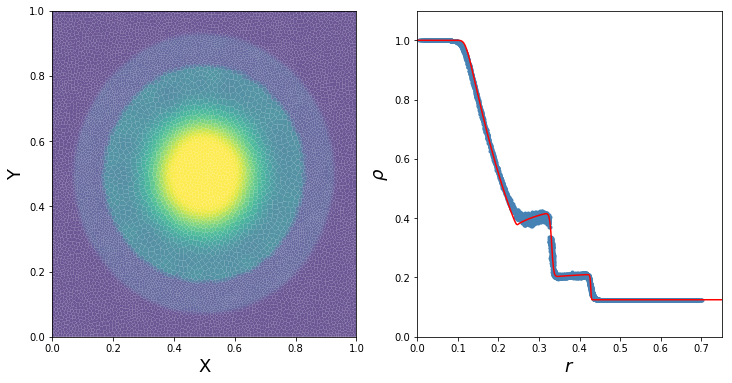

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

# plot voronoi
p.set_array(np.array(colors))
p.set_clim([0, 1.0])
ax = axes[0]
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.add_collection(p)

# plot radial solution
ax = axes[1]
ax.plot(rad, sedov["density"], ".", color="steelblue", label="simulation")
ax.plot(rad_ex, rho_ex, "red", label="exact")
ax.set_xlim(0,0.75)
ax.set_ylim(0,1.1)
ax.set_xlabel(r"$r$", fontsize=18)
ax.set_ylabel(r"$\rho$", fontsize=18);

In [13]:
from IPython.display import HTML
HTML('<img src="explosion.gif">')